# Audio Classifier

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 44

def seed():
    np.random.seed(RANDOM_STATE)

seed()

In [3]:
FIG_PATH = "figures"
if not os.path.isdir(FIG_PATH):
    os.mkdir(FIG_PATH)

def save_plot(name):
    plt.savefig(os.path.join(FIG_PATH, name + ".pdf"), bbox_inches="tight")

## Import vowels dataset

In [4]:
data_train_vowels = np.loadtxt("ae.train")
data_test_vowels = np.loadtxt("ae.test")

In [5]:
def get_labels(data, block_lens):
    """
    return format of X:
        - array of recordings
        - per recording:
            - each row is a recording frame (time step), beware varies! 
            - each column is a channel (always 12)
    """
    X = []
    y = []
    prev_row_idx = 0
    speaker_num = 0
    count = 0

    for i in range(data.shape[0]): # go through all rows
        
        # check each row 
        # rows of 1 indicate new recording
        if np.all(data[i,:] == 1):
            
            X.append(data[prev_row_idx:i,:])
            prev_row_idx = i + 1 # plus 1 to not include row of 1's
            
            y.append(speaker_num)
            count += 1 # count examples per speaker
            
            if count == block_lens[speaker_num]:
                count = 0
                speaker_num += 1 # next class
                
    return X, y

In [6]:
train_block_lens = [30] * 9
test_block_lens = [31, 35, 88, 44, 29, 24, 40, 50, 29]

X_train_vowels, y_train_vowels = get_labels(data_train_vowels, train_block_lens)
X_test_vowels, y_test_vowels = get_labels(data_test_vowels, test_block_lens)

## Inspect vowels dataset

In [7]:
COLORS = sns.color_palette("Spectral",n_colors=12)

def plot_recording(ax, rec_data, title=None):
    [ax.plot(x, color=COLORS[i]) for i, x in enumerate(rec_data)]
    ax.set_xlim(0, 22)
    ax.set_ylim(-1.5, 2)
    if title:
        ax.title.set_text("$\it{" + title + "}$")

In [8]:
def add_axis_labels(fig):
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel("Time Step")
    plt.ylabel("LPCC")

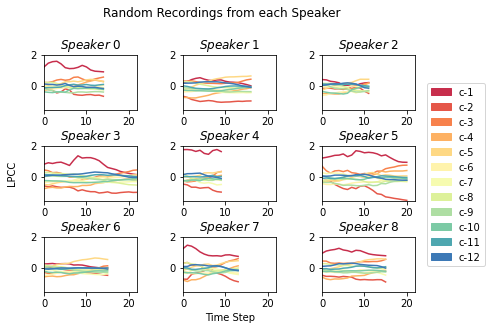

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=3)
fig.tight_layout(pad=1.5)


max_range = 30
min_range = 0
count = 0

for row in ax:
    for col in row:
        random_point = np.random.randint(min_range, max_range)
        min_range += 30
        max_range += 30
        plot_recording(col, X_train_vowels[random_point].T, title="Speaker \;" + str(count))
        count += 1

seed()
add_axis_labels(fig)
fig.suptitle("Random Recordings from each Speaker", y=1.1)
patches = [mpatches.Patch(color=c, label="c-" + str(i + 1)) for i, c in enumerate(COLORS)]
plt.legend(handles=patches, bbox_to_anchor=(1.2, 0.9))
save_plot("rand_speakers")
plt.show()

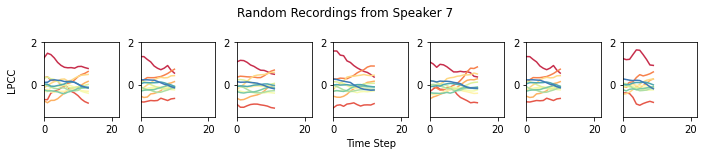

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(10, 2))
speaker = 7

for i, col in enumerate(ax):
    plot_recording(col, X_train_vowels[np.random.randint(speaker * 30, (speaker * 30) + 30)].T)

seed()
add_axis_labels(fig)
fig.suptitle("Random Recordings from Speaker " + str(speaker), y=1.1)
fig.tight_layout(pad=0)
save_plot("speaker_" + str(speaker))
plt.show()

In [11]:
def plot_rec_len_freq(data_ls, title, xlab="Recording Length"):
    lens = [x.shape[0] for x in data_ls]
    min_, max_ = min(lens), max(lens)
    print("Min length:", min_, "Max length:", max_)
    plt.hist(lens)
    plt.xlim(0, 30)
    plt.xlabel(xlab)
    plt.ylabel("Frequency")
    plt.title(title)
    save_plot(title + "rec_len")
    plt.show()

Min length: 7 Max length: 26


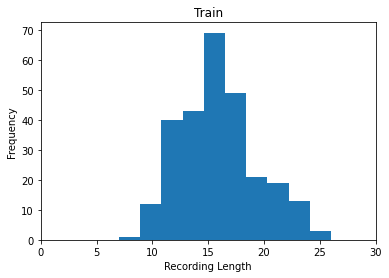

Min length: 7 Max length: 29


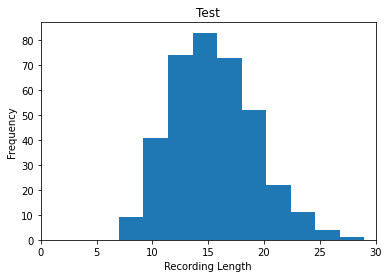

In [12]:
plot_rec_len_freq(X_train_vowels, "Train")
plot_rec_len_freq(X_test_vowels, "Test")